<a href="https://colab.research.google.com/github/Rajeswari0410/Movie-recommendation-system/blob/main/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Digit Recognition using KNN**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
dfx = pd.read_csv('/content/gdrive/MyDrive/RWDS/Digit recog/Bootcamp Day4/xdata.csv') 
dfy = pd.read_csv('/content/gdrive/MyDrive/RWDS/Digit recog/Bootcamp Day4/ydata.csv')


In [6]:
#Converting csv to numpy arrays:
X = dfx.values
Y = dfy.values
print(X)
#print(Y)
print(X.shape)
print(Y.shape)

[[ 1.00000000e+00  3.51627900e+00  3.71975047e+00]
 [ 2.00000000e+00  4.60649561e+00  3.41437943e+00]
 [ 3.00000000e+00  4.67701056e+00  3.04724443e+00]
 ...
 [ 3.97000000e+02  7.89625683e-01  9.31669806e-01]
 [ 3.98000000e+02 -1.00253042e+00 -6.76162472e-01]
 [ 3.99000000e+02  2.92386778e-01  5.61177823e-01]]
(399, 3)
(399, 2)


In [7]:
#slicing X and Y
X = X[ : ,1: ]
Y = Y[ : ,1].reshape((-1, ))
#print(X)
print(Y)
print(X.shape)
print(Y.shape)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

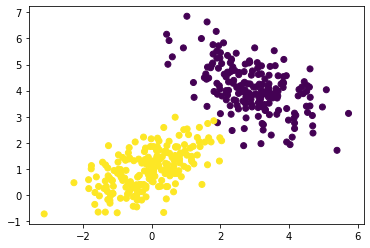

In [9]:
#Graphs:
plt.scatter(X[:,0],X[:,1],c = Y) # Here Y has two groups: 0 or 1
plt.show()

Let we take a query point


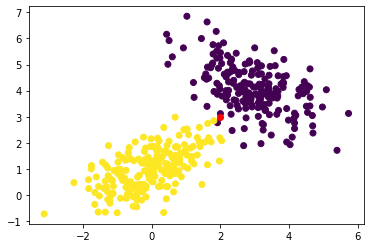

In [10]:
query_x = np.array([2,3])
plt.scatter(X[:,0],X[:,1],c=Y)
plt.scatter(query_x[0],query_x[1],color='red')
plt.show()

Defining functions to calculate distance between points and for KNN

In [11]:
def dist(x1,x2):
  return np.sqrt(sum((x2-x1)**2))

def knn(X,Y,querypoint,k=5):
  val = []
  m=X.shape[0]
  for i in range(m):
    d=dist(querypoint,X[i])
    val.append((d,Y[i]))
  val = sorted(val)
  val = val[:k]  #checking till k nearest points
  val = np.array(val)
  print(val)
  new_val = np.unique(val[:,1],return_counts = True) #max. vote
  print(new_val)
  index = new_val[1].argmax()
  pred = new_val[0][index]
  return pred
  return val

In [12]:
knn(X,Y,query_x)

[[0.11937695 0.        ]
 [0.24392799 1.        ]
 [0.24435617 0.        ]
 [0.32750158 0.        ]
 [0.44941874 1.        ]]
(array([0., 1.]), array([3, 2]))


0.0

MNIST Datasets

In [13]:
df = pd.read_csv('/content/gdrive/MyDrive/RWDS/Digit recog/Bootcamp Day4/train.csv')
print(df.shape)

(42000, 785)


In [14]:
#KNN finds distance of pixels and compare them
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [15]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Creating Numpy Arrays 

In [16]:
data = df.values
print(data.shape)
print(type(data))

(42000, 785)
<class 'numpy.ndarray'>


In [17]:
#Slicing the array
X = data[:,1:] # X is for pixel value
Y = data[:,0]  # Y is for label
print(X.shape,Y.shape)

(42000, 784) (42000,)


This data is divided into two parts. 80% for training and 20% for testing

In [19]:
#Slicing of data:
print(X.shape[0])
split = int(0.8*X.shape[0])
print(split)

42000
33600


In [21]:
X_train = X[:split,:]
Y_train = Y[:split]
X_test = X[split: ,:]
Y_test = Y[split: ]
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


Testing

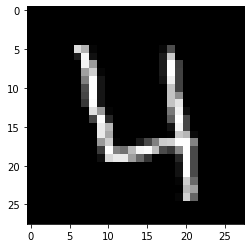

4


In [24]:
def drawImg(sample):
  img = sample.reshape((28,28)) 
  plt.imshow(img,cmap="gray")
  plt.show()
drawImg(X_train[3])
print(Y_train[3])


Making Predictions

[[1542.92968083    9.        ]
 [1628.1547838     9.        ]
 [1657.74606017    9.        ]
 [1710.06198718    9.        ]
 [1738.89390131    5.        ]]
(array([5., 9.]), array([1, 4]))
9.0


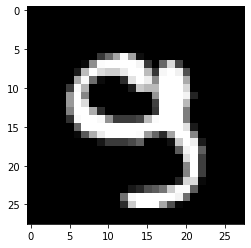

9


In [27]:
prediction = knn(X_train,Y_train,X_test[15])
print(prediction)

drawImg(X_test[15])
print(Y_test[15])